# Kaggle-Tutorial

## Time Series

---

## 특징Features으로서의 시계열

시차 임베딩으로 과거로 부터 미래를 예측한다.

원본: [Time Series as Features](https://www.kaggle.com/ryanholbrook/time-series-as-features)
---
### 직렬 종속성Serial Dependence란?

이전 수업에서, 우리는 시간 종속 속성으로 쉽게 모델링되는 시계열의 속성들properties, 곧 시간 인덱스에서 직접 파생될 수 있는 특징들을 조사했다. 그러나 일부 시계열 속성은 오직 *직렬적인serially 종속dependent* 속성, 곧, 목표 시리즈의 과거 값들 특징feature으로만 모델링할 수 있다. 이러한 시계열의 구조는 시간 경과에 따른 플롯에서는드러나지 않을 수 있지만, 아래 그림에서 듯 과거 값에 대해서는 플롯을 확인할 수 있다.
![Time Dependence vs. Serial Dependence](https://i.imgur.com/X0sSnwp.png)

<center>이 두 시리즈는 직렬 종속성을 갖지만, 시산 종속성은 없다. 오른쪽의 점들은 좌표(시점 t-1값, 시점 t값)를 가진다</center>

추세trend와 계절성seasonality을 사용하여, 위 그림의 왼쪽과 같은 플롯에 곡선을 맞추도록 모델을 훈련했다. 모델은 시간 종속성을 학습했다. 이 수업의 목표는 오른쪽 플롯과 같이 곡선을 맞추도록 모델을 훈련시기는 것으로 , 이를 통해 직렬 종속성을 배우길 바란다.


주기Cycles

직렬 종속성을 나타내는 특히 일반적인 방식 중 하나는 주기들cycles이다. 주기는 시계열의 값 안에서 성장과 감소의 패턴으로 이는 이전의 값에 따라 달라지지만, 반드시 시간 단계 그 자체에 따라 달라지는 것은 아니다. 주기적Cyclic 행동은 시스템 자체에 영향을 줄수 있거나, 시간이 지남에 따라 반응이 지속되는 시스템의 특징이다. 경제, 전염병, 동불 개체군, 화산 폭발 및 이와 유사한 자연현상은 종종 주기적인 행동을 볼 수 있다.

![](https://i.imgur.com/CC3TkAf.png)

<center>주기적 행동을 가진 4개의 시계열</center>

주기적인 행동과 계절성을 구분함에 있어, 주기는 계절성과는 달리 반드시 시산에 의존하는 것은 아니라는 것이다. 주기에서 일어나는 일은 특정 발생날짜가 아니라 최근 일어난 일에 대한 과거의 일에 더 큰 관계가 있다. (적어도 상대적인) 시간에 대한 독립성은 주기적인 행동이 계절성보다 훨씬 더 불규칙 할 수 있음을 의미한다.

### 시차 계열lagged Series 및 시차 플롯

시계열에서 가능한 직렬 종속성(예: 주기)을 조사하려면, 시리즈의 "시차된" 복사본을 만들어야 한다. 시계열을 **시차**시킨다는 것은 값을 하나 이상의 시간 단계 앞으로 이동하거나, 인덱스의 시간을 동일하게 한 단계 이상 뒤로 이동하는 것을 의미한다. 두 경우 모두, 시차 계열의 관측값이 나중에 발생한 것 처럼 보이게 되는 효과가 있다.

이것은 미국의 월별 실업률(`y`)과 첫 번째 및 두 번째 시차 시리즈(각각 `y_lag_1` 및 `y_lag_2`)를 보여준다. 시차 계열의 값이 시간에 따라 앞으로 이동하는 방식을 확인합니다.

In [2]:
import pandas as pd

# Federal Reserve dataset: https://www.kaggle.com/federalreserve/interest-rates
reserve = pd.read_csv(
    "./input/ts-course-data/reserve.csv",
    parse_dates={'Date': ['Year', 'Month', 'Day']},
    index_col='Date',
)

y = reserve.loc[:, 'Unemployment Rate'].dropna().to_period('M')
df = pd.DataFrame({
    'y': y,
    'y_lag_1': y.shift(1),
    'y_lag_2': y.shift(2),
})

df.head()

,y,y_lag_1,y_lag_2
Date,,,
1954-07,5.8,NaN,NaN
1954-08,6.0,5.8,NaN
1954-09,6.1,6.0,5.8
1954-10,5.7,6.1,6.0
1954-11,5.3,5.7,6.1


시차 계열에 따라, 우리는 과거 값이 우리가 예측하려는 값과 동시에 나타나도록 만들 수 있다(다른 말로, 같은 행에서). 이렇게 만든 시차 계열은 직렬 종속성을 모델링하는 특징으로 유용하다. 미국 실업률 시리즈를 예측하기 위해 y_lag_1과 y_lag_2를 특성으로 사용하여 목표 y를 예측할 수 있다. 이는 이전 2개월 동안의 실업률의라는 함수로서 미래의 실업률을 예측할 것이다.

![](https://i.imgur.com/Hvrboya.png)

<center>자기 상관autocorrelations이 표시된 미국 실업률의 시차 도표</center>

가장 일반적으로 직렬 종속성을 측정하는 방식은 자기 상관autocorrelations이라 알려져 있으며, 이는 단순히 시차들 중 하나와 갖는 상관 관계이다. 미국 실업의 자기 상관은 lag 1에서는 0.99, lag 2에서는 0.98 등이다.

#### 시차 선택

특성으로 사용할 시차를 선택할 때, 큰 자기상관이 있는 *모든* 시차를 포함하는 것은 일반적으로 유용하지 않다. 예를 들어 미국 실업에서 시차 2의 자기 상관은 시차 1의 "감소된" 정보의 결과일 수 있다. 곧, 바로 이전 단계에서 이월된 상관관게일 수 있다. 만일 시차 2가 그 어떤 새로운 것이 포함되어 있지 않지 않다면 이미 포함되어 있는 시차 1을 포함할 이유는 없다.

**부분 자기 상관**은 이전 모든 시차들에 따른 시사의 상관관계, 곧 "새로운" 상관 관계의 양을 알려준다. 부분 자기 상관을 플로팅하면 사용할 시차 특징들을 선택하는데 도움이 될 수 있다. 아래 그림에서 시차 1~ 시차 6은 "상관없음(파란색)을 벗어나므로 이는 미묵 실업에 대한 특징으로 선택할 수 있다(시차 11은 거짓양성일 가능성이 있다)"

![](https://i.imgur.com/6nTe94E.png)

<center>상관 관계가 없는 95% 신뢰구간과 12개의 시차를 이용한 미국 실업의 부분 자기 상관 12</center>

위와 같은 플롯을 *코렐로그램correlogram*이라 한다. 코렐로그램은 본질적으로 푸리에 특징에 대한 주기도에 대한 시차특징이다.

마지막으로 우리는 자기상관과 부분 자기상관이 *선형* 의존성의 척도라는 것을 염두해야 한다. 실제 시계열은 종종 상당한 비선형 종속성을 갖기에, 시차 특성을 선택할 때 시차 플롯을 보는 것이 가장 좋다(또는 [상호 정보](https://www.kaggle.com/ryanholbrook/mutual-information)와 같은 좀더 일반적인 종속성 특성을 사용).*Sunspots* 시리즈는 자기 상관으로 오인할만한 비선형 의존성과 시차를 가지고 있다.
![](https://i.imgur.com/Q38UVOu.png)

<center>Sunspots시리즈의 시차 플롯</center>

이와 같은 비선형 관계는 선형으로 변환되거나 적절할 알고리즘에 의해 학습될 수 있다.

### 예- 독감 추세

*독감 추세* 데이터 셋은 2009년에서 2016년 사이 몇 주 동안 독감으로 의사를 방문한 기록이 들어가 있다. 우리의 목표는 앞으로 몇주 동안의 독감 사례 수를 예측하는 것이다.

우리는 두 가지 접근 방식을 취할 것이다. 첫번째는 시차 특징을 사용하여 의사의 방문을 예측한다. 두번째는 다른 시계열 집단(Google Trends에서 포착한 독감 관련 검색어)의 시차를 사용하여 의사의 방문을 예측하는 것이다.

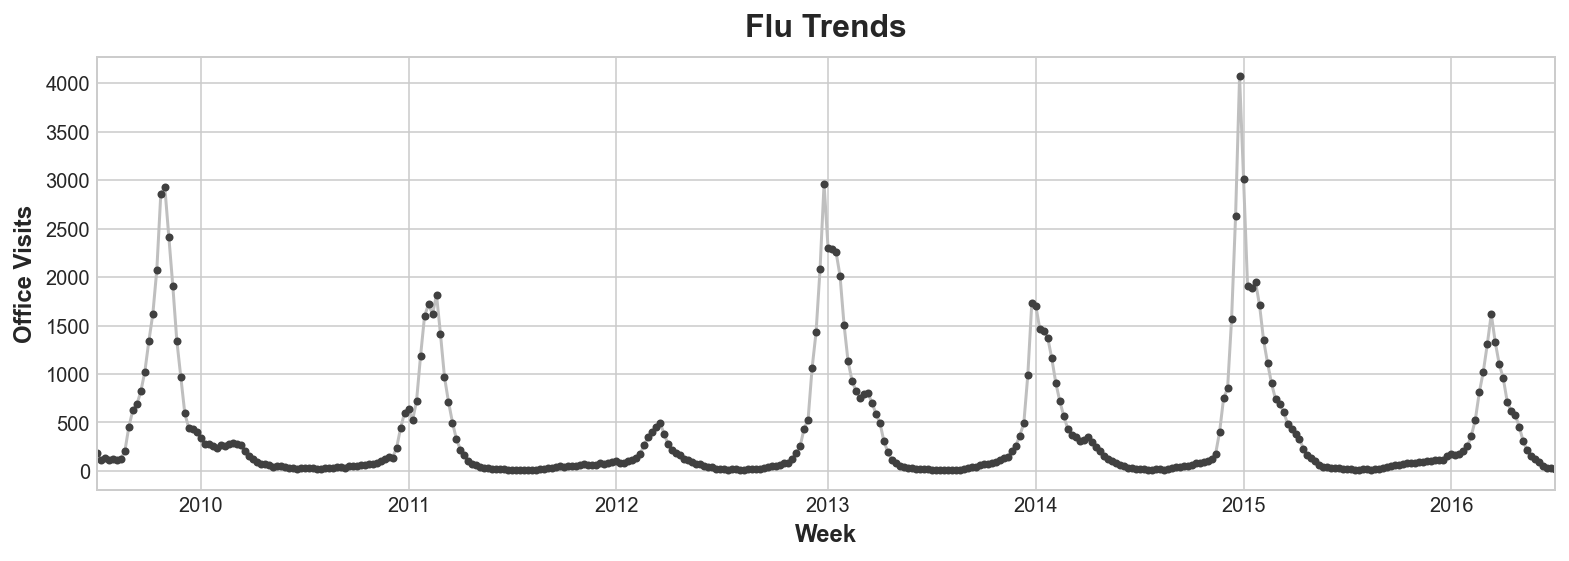

In [7]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


data_dir = Path("./input/ts-course-data")
flu_trends = pd.read_csv(data_dir / "flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

ax = flu_trends.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

*독감 추세* 데이터는 규칙적인 계절성 대신 불규칙한 주기를 보여준다. 정점은 새해 즈음에 발생하는 추세이지만, 때로는 더 빠르거나 늦게, 때로는 더 크거나 작게 나타난다. 시차 특성으로 이러한 주기를 모델링하면 예측모델은 시계열 특징에 따른 정확한 날짜와 시간이라는 제약에서 벗어나 변화하는 상태에 따라 동적으로 반응할 수 있다.

먼저 시차 및 자기상관 플롯을 살펴보자


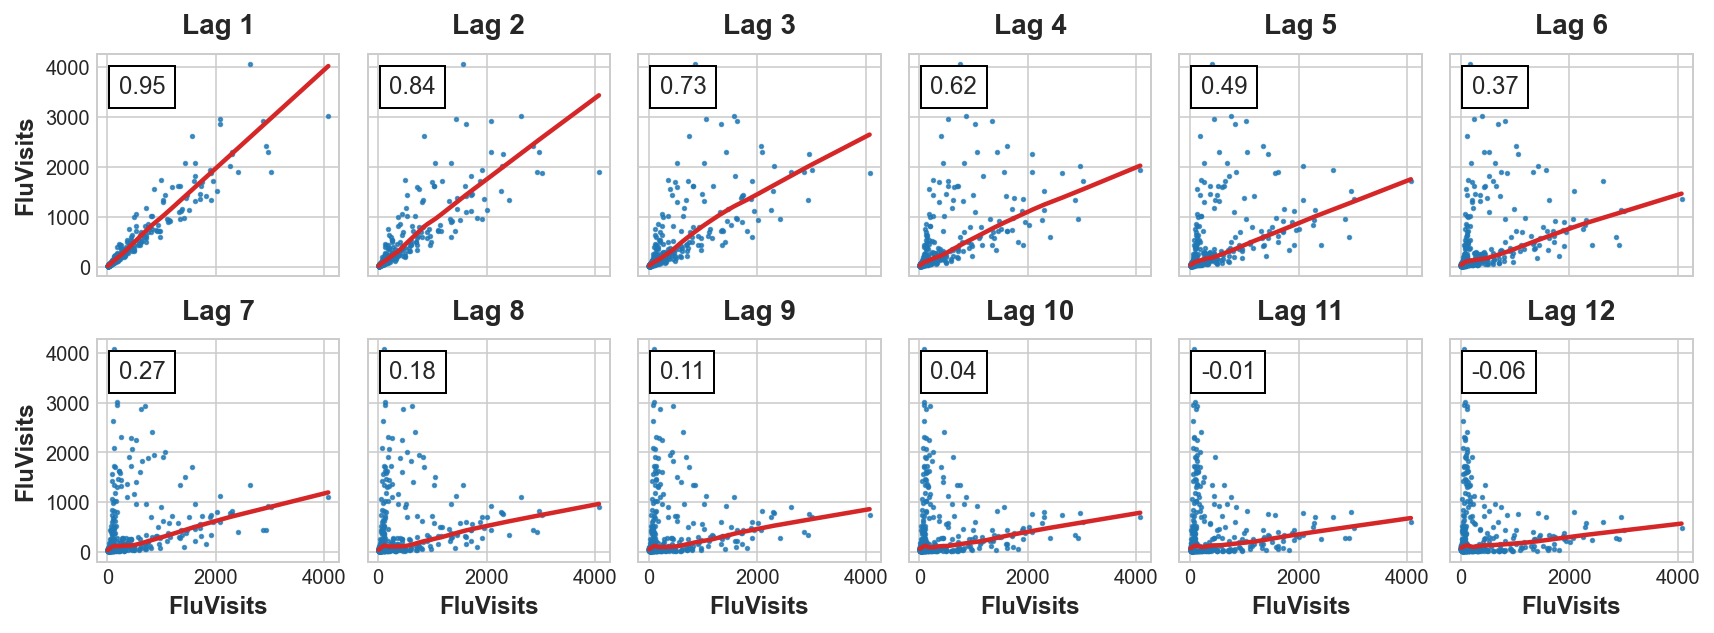

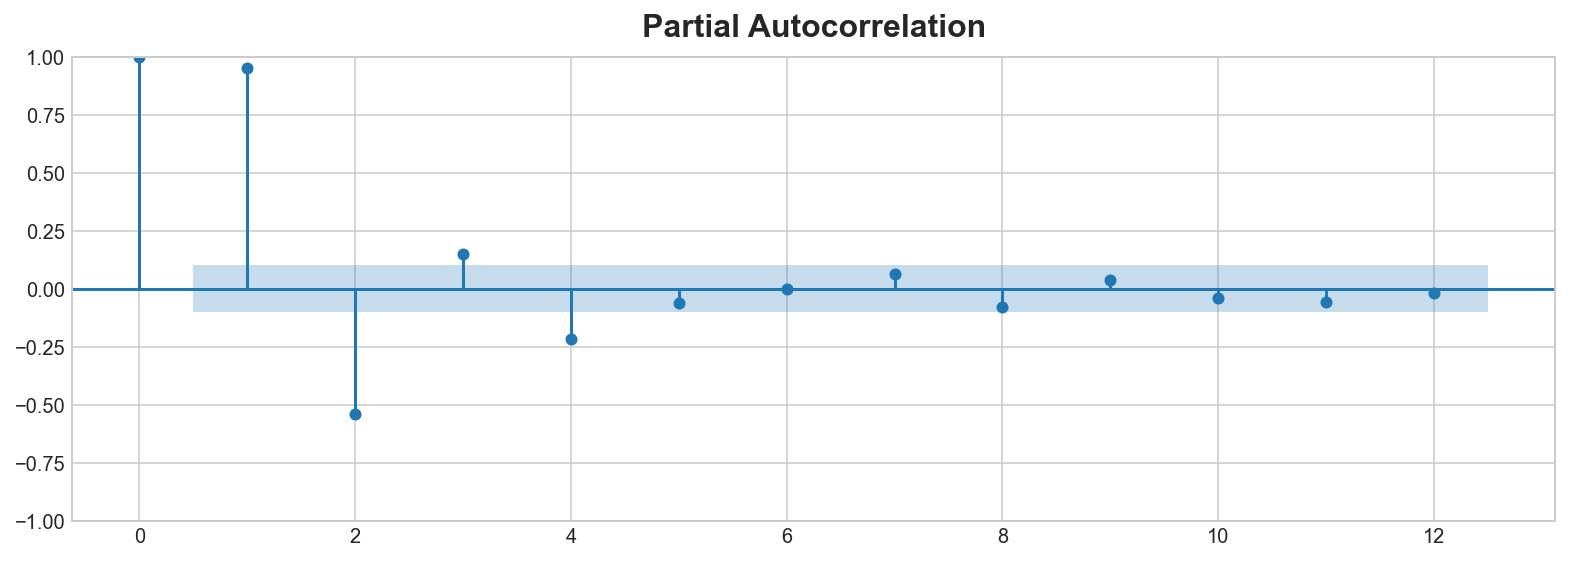

In [8]:
_ = plot_lags(flu_trends.FluVisits, lags=12, nrows=2)
_ = plot_pacf(flu_trends.FluVisits, lags=12)

시차 플롯는 시차와 `FluVisits`의 관계가 대부분 선형임을 보여주는 반면, 부분 자기상관은 시차 1, 2, 3, 4를 사용하여 종속성읍 포착할 수 있음을 나타낸다. 우리는 Pandas의 `Shift` 메서드를 통해 시계열을 시차시킬 수 있다. 이 문제의 경우, 시차되어 누락된 값을 0.0으로 채운다.



In [9]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(flu_trends.FluVisits, lags=4)
X = X.fillna(0.0)

우리는 이전수업에서 훈련데이터 외에 원하는 만큼의 많은 단계에 대한 예측을 생성할 수 있었다. 그러나, 시차 특성을 이용할 때는 예측할 수 있는 시간의 단계는 시차시킨 값으로 제한된다. 월요일에 시차 1을 사용하면 필요한 시차 1의 값이 아직 발생하지 않은 것은 화요일까지이므로 수요일에 대한 예측을 할 수 없다.

6과에서 이 문제를 처리할 수 있는 전략을 볼 것이나, 여기서는 테스트 셋의 값만을 사용한다.

In [10]:
# Create target series and data splits
y = flu_trends.FluVisits.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

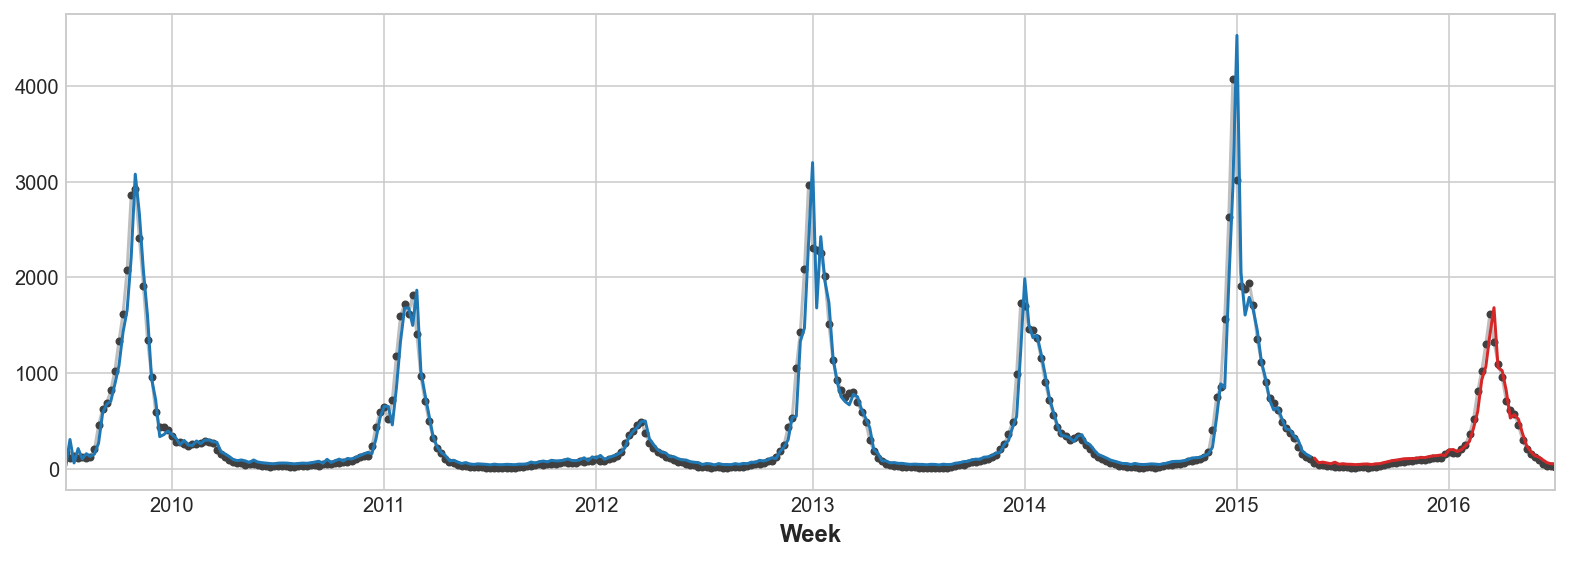

In [11]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

예측 값만 봐도 우리의 모델이 목표 시리즈의 갑작스러운 변화에 반응하기 위해 필요한 시간 단계가 어떻게 필요한지 알 수 있다. 이는 대상 계열의 시차만 기능으로 사용하는 모델의 일반적인 제한 사항입니다.

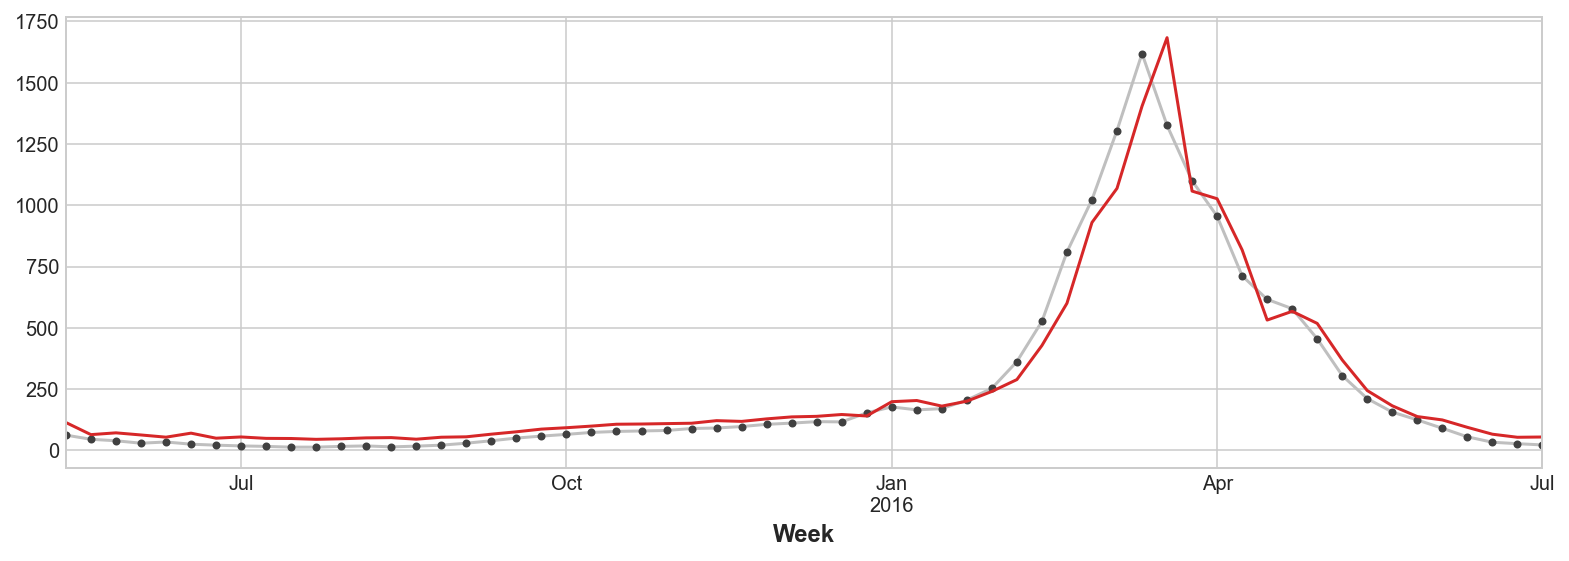

In [12]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

예측을 개선하기 위해 독감 사예의 변화에 대한 "조기 경보"를 제공할 수 있는 시계열인 *선행 지표*를 찾고자 할 수 있다. 우리의 두번째 접근의 경우 Google Trends에서 측정한 일부 독감 관련 검색어의 인기도를 교육데이터에 추가한다.

타깃인 '`FluVisits`'와 비교하기 위한 검색구문 '`FluCough`'을 플롯팅하면 이러한 검색어가 선행지표로 유용할 수 있음을 볼 수 있다. 독감 관련 검색은 의사 방문 몇 주 전에 더 인기있는 경향이 있다.

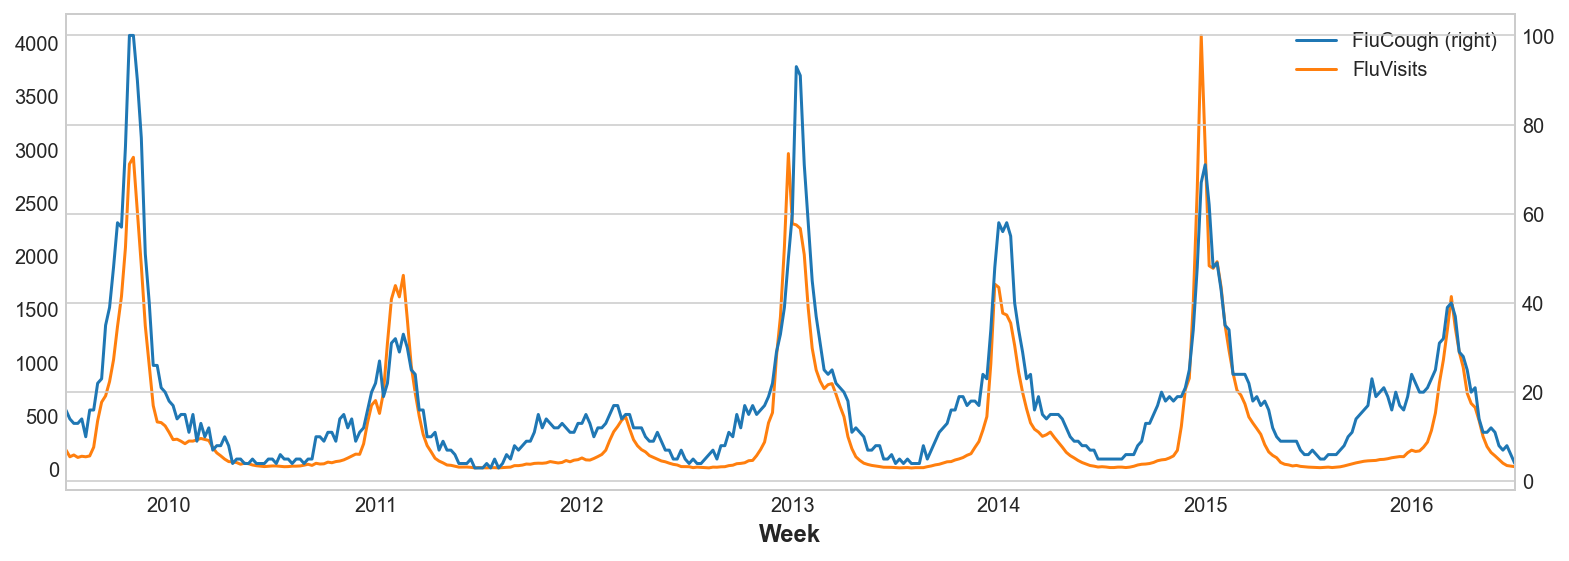

In [13]:
ax = flu_trends.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

데이터 셋에는 이러한 종류의 129개의 용어가 있지만, 우리는 몇개만 사용하겠다.

In [14]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(flu_trends[search_terms], lags=3)

# Create four lags for the target, as before
X1 = make_lags(flu_trends['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

우리의 예측은 꽤 거칠긴하지만 우리 모델은 독감으로인한 방문의 극격한 증가를 잘 예측할 수 있는 것으로 보이며, 인기 검색어의 여러 시계열은 선행지표로 효과적임을 시사한다.

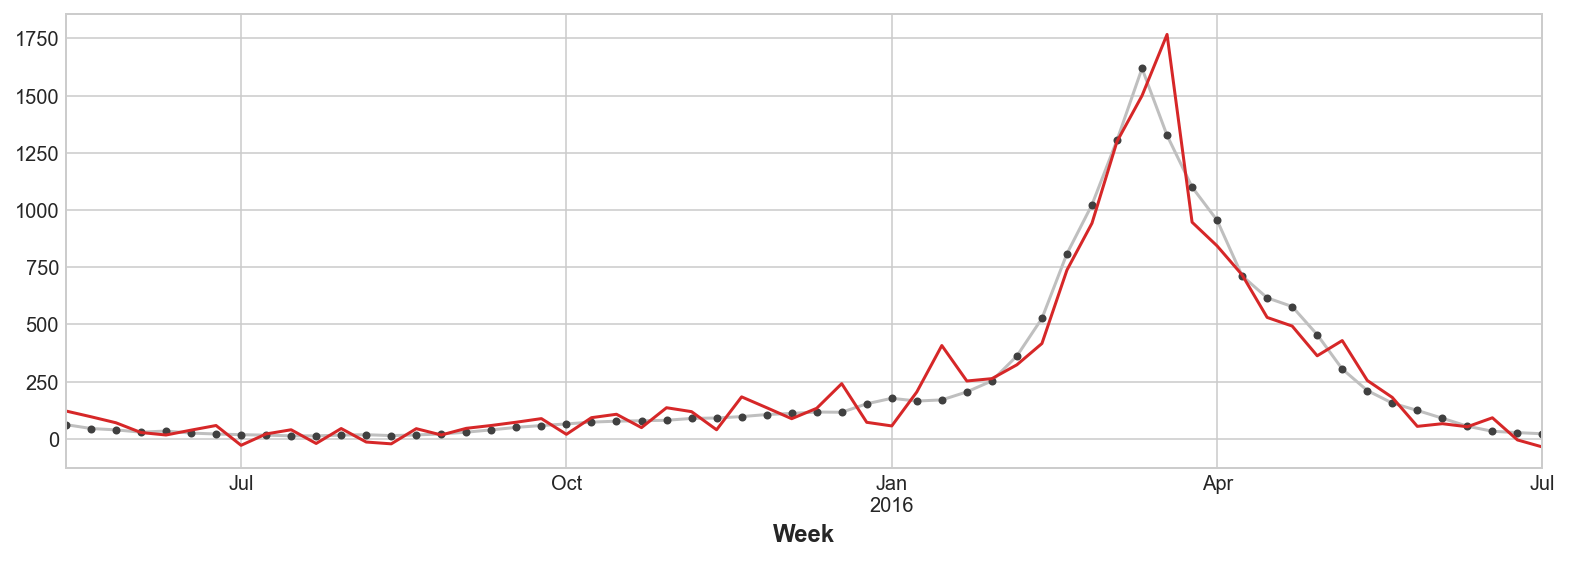

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

이 단원에서 묘사하는 시계열은 "순수한 주기"라고 부를 수 있는 뚜렷한 추세나 계절성이 없는 시계열이다. 시계열이 추세, 계절성 그리고 추기를 모두 갖는 것은 그리 드문일은 아니다. 각 구성 요소를 적절한 특성으로 추가하기만 하면 선형 회귀로 이러한 시리즈를 모델링할 수 있다. 구성 요소를 개별적으로 학습하도록 훈련된 모델을 결합할 수도 있다. 이는 다음 단원에서 *하이브리드 예측*을 수행하는 방법을 배울 것이다.

### 당신의 차례


[매장 판매를 위한 시차 피쳐](https://www.kaggle.com/kernels/fork/19616002)을 만들고 다른 종류의 시계열 기능을 탐색하자.